<svg width="100%" height="100">
    <rect x="0" y="0" width="100%" height="100" fill="black" />
    <text x="50%" y="50%" dominant-baseline="middle" text-anchor="middle" font-size="30" fill="ORANGE">ANALYSIS ON CRIME DATA SET</text>
</svg>

In [81]:
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")



In [82]:
connection=pymysql.connect(host='localhost',user='root',passwd='Goal@1234',database='crime_data')

In [83]:
query ="select * from crime_data"

In [84]:
df = pd.read_sql(query,connection)
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,1/8/2020,1/8/2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,1/2/2020,1/1/2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,1/1/2020,1/1/2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,1/1/2020,1/1/2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,1/2/2020,1/2/2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,2/7/2020,2/7/2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,2/7/2020,2/7/2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,2/7/2020,2/7/2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,2/7/2020,1/10/2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


<h1><font color="orange">Exploratory Data Analysis - Crime Data Set</h1>




 <h3><font color="yellow">1. Distribution of Crimes by Area</h3>

In [85]:
query = 'SELECT AREA_NAME, Crm_Cd_Desc, COUNT(AREA_NAME) FROM crime_data GROUP BY AREA_NAME, Crm_Cd_Desc ORDER BY COUNT(AREA_NAME) DESC'
df = pd.read_sql(query,connection)
df

,AREA_NAME,Crm_Cd_Desc,COUNT(AREA_NAME)
0,Central,BURGLARY FROM VEHICLE,79
1,Central,BATTERY - SIMPLE ASSAULT,69
2,Central,THEFT PLAIN - PETTY ($950 & UNDER),41
3,Central,SHOPLIFTING - PETTY THEFT ($950 & UNDER),27
4,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",24
...,...,...,...
89,West LA,BURGLARY,1
90,Central,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),1
91,Wilshire,THEFT PLAIN - PETTY ($950 & UNDER),1
92,Hollywood,THEFT PLAIN - PETTY ($950 & UNDER),1


Based on the provided data showing the distribution of crime over different areas, we can make the following observations:

 <span style="color: orange;">**1. Central Area**:</span> 
   - The most common types of crimes in the Central area are <span style="color: green;">"Burglary from Vehicle","Battery - Simple Assault"</span>
   - "Burglary from Vehicle" appears to be the most frequent crime , with 79 reported incidents.
   - This is the most affected area it's having more than <span style="color: green;">70+ Incidents</span>

 <span style="color: orange;">**2. West LA Area:**</span>
   - The data suggests a relatively lower frequency of reported crimes compared to the Central area, with only one reported incident of "Burglary."
   - It is one of the area which reported <span style="color: green;">lowest crime rate</span>

<span style="color: violet;">**Suggestions:**</span> 

   Overall, the analysis reveals variations in the distribution of crime across different areas, with certain types of crimes being more prevalent in some areas compared to others. This information can be valuable for law enforcement agencies and policymakers to prioritize resources and implement targeted interventions to address specific crime trends in each area.

<h3><font color="yellow">2. Distribution of Crimes Over Time</h3>

In [86]:
query = 'SELECT DATE_OCC, COUNT(*) AS Crime_Count FROM crime_data GROUP BY DATE_OCC ORDER BY DATE_OCC'
df = pd.read_sql(query,connection)
df


,DATE_OCC,Crime_Count
0,1/1/2020,34
1,1/10/2020,24
2,1/11/2020,38
3,1/12/2020,18
4,1/2/2020,27
...,...,...
56,9/1/2020,1
57,9/2/2020,1
58,9/4/2020,1
59,9/8/2020,1


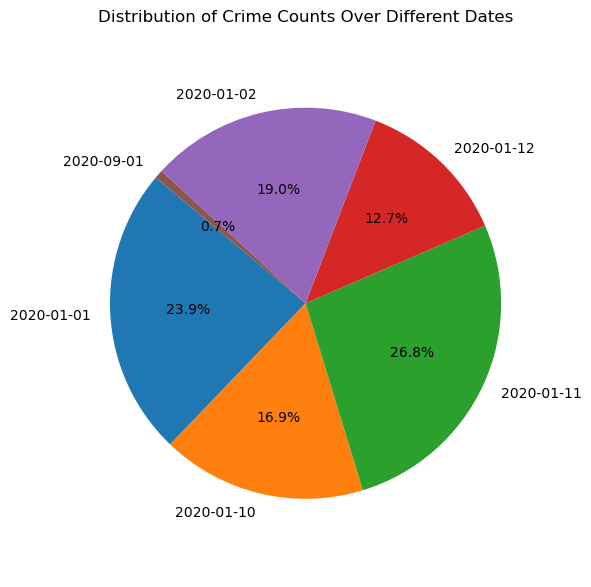

In [87]:
data = {
    'DATE_OCC': ['1/1/2020', '1/10/2020', '1/11/2020', '1/12/2020', '1/2/2020', '9/1/2020'],
    'Crime_Count': [34, 24, 38, 18, 27, 1]
}
data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'])
df = pd.DataFrame(data)
plt.figure(figsize=(6, 6))
plt.pie(df['Crime_Count'], labels=df['DATE_OCC'].dt.date, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Counts Over Different Dates')
plt.axis('equal')  
plt.tight_layout()
plt.show()


Based on the provided data showing the distribution of crime over different time span, we can make the following observations:

 <span style="color: orange;">**1. January Month**:</span> 
   - <span style="color: green;">The most number of crimes</span> happens in this month
   - This data indicates that in <span style="color: green;">starting of every month there is more numbers of crime</span> as compared to end of the month.

<span style="color: violet;">**Suggestions:**</span> 

Overall, the analysis reveals variations in the distribution of crime over different times, with crimes being more prevalent in starting of months if compared with end of month. This information can be valuable for law enforcement agencies and policymakers to prioritize resources and implement targeted interventions to address specific crime trends in each area at each time.

<svg width="100%" height="100">
    <rect x="0" y="0" width="100%" height="100" fill="black" />
    <text x="12%" y="50%" dominant-baseline="middle" text-anchor="middle" font-size="30" fill="yellow">SPATIAL ANALYSIS -</text>
</svg>

<h4><font color="orange">Q1. Where are the geographical hotspots for reported crimes?</h4>


In [98]:
hotspots = 'SELECT LAT, LON, AREA_NAME, COUNT(*) as Crime_Count from crime_data where LAT is not null and LON is not null group by AREA_NAME, LAT, LON'
data1 = pd.read_sql(hotspots,connection)
data1

,LAT,LON,AREA_NAME,Crime_Count
0,34.01,-118.30,Southwest,2
1,34.05,-118.25,Central,75
2,34.17,-118.40,N Hollywood,1
3,34.22,-118.45,Mission,1
4,34.05,-118.26,Central,94
...,...,...,...,...
77,34.07,-118.37,Wilshire,1
78,34.11,-118.24,Northeast,1
79,34.08,-118.35,Wilshire,1
80,34.10,-118.30,Hollywood,1


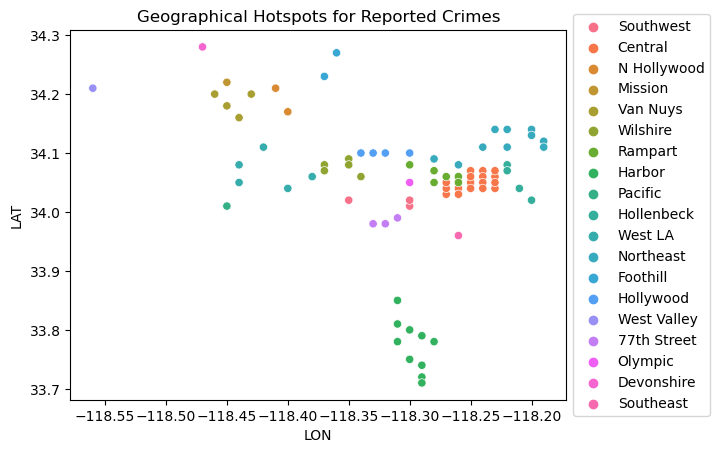

In [99]:
sns.scatterplot(x="LON", y="LAT", hue="AREA_NAME", data=data1)
plt.title('Geographical Hotspots for Reported Crimes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.show()

<span style="color: violet;">**Observation:**</span> 

<span style="color: red;">Central Area in Longitude 118.25 and Latitude 34.1</span> seems to have the highest number of reported crimes, followed by other areas like Hollywood, Wilshire, and Southwest. This suggests that these areas might have higher crime rates compared to others.

 The crime counts are not evenly distributed across the city. Some areas have <span style="color: red;">significantly higher</span> crime counts compared to others. This indicates potential hotspots or areas with <span style="color: green;">higher criminal activity that may require additional attention from law enforcement.</span>

 Collaborating with local communities in high-crime areas can help address underlying issues contributing to crime and foster community-led initiatives for crime prevention and intervention.

<svg width="100%" height="100">
    <rect x="0" y="0" width="100%" height="100" fill="black" />
    <text x="15%" y="50%" dominant-baseline="middle" text-anchor="middle" font-size="30" fill="yellow">VICTIM DEMOGRAPHICS - </text>
</svg>

<h4><font color="orange">Q2A. What is the distribution of victim ages in reported crimes?</h4>

In [90]:
victimages='select vict_Age from crime_data'
df = pd.read_sql(victimages,connection)
fig = px.histogram(df, x='vict_Age', title='Distribution of Victim Ages in Reported Crimes',
                   labels={'vict_Age': 'Victim Age', 'count': 'Number of Crimes'}, color_discrete_sequence=['dark blue'])
fig.update_traces(marker_line_color='black', marker_line_width=1)  
fig.update_layout(barmode='overlay', xaxis_title='Victim Age', yaxis_title='Number of Crimes', height=400, width=800)
fig.show()



<span style="color: violet;">**Observation:**</span> 

Clearly it is visible Number of crimes is <span style="color: red;">very high in infant age i.e 0-4</span> so authorities can take necessary action like launching <span style="color: green;">Early childhood development programs and targeted intervention must be needed for High-Risk Families.</span>

<h4><font color="orange">Q2B. Is there a significant difference in crime rates between male and female victimes?</h4>

In [91]:

diffbetweengender = 'SELECT Vict_Sex, COUNT(*) as Crime_Count from crime_data group by Vict_Sex'
data1 = pd.read_sql(diffbetweengender,connection)
data1

fig = px.pie(data1, values='Crime_Count', names='Vict_Sex', title='Crime Distribution by Victim Gender')
fig.update_layout(width=700,paper_bgcolor='black',plot_bgcolor='black',title_font_color='white',font_color='white')
fig.show()



<span style="color: violet;">**Observation:**</span> 

Clearly it's visible that crime rate is <span style="color: red;">very high in female gender</span> as compare to Men so authorities need to launch more women empowerement and safety policies 

<svg width="100%" height="100">
    <rect x="0" y="0" width="100%" height="100" fill="black" />
    <text x="14%" y="50%" dominant-baseline="middle" text-anchor="middle" font-size="30" fill="yellow">LOCATTION ANALYSIS -</text>
</svg>

<h4><font color="orange">Q3. Where do most crime occur based on "Location" column?</h4>

In [92]:
mostcrimelocation = 'SELECT Location,COUNT(*) AS Crime_Count FROM crime_data GROUP BY Location ORDER BY Crime_Count DESC LIMIT 10'
df =pd.read_sql(mostcrimelocation,connection)
df

,Location,Crime_Count
0,800 N ALAMEDA ST,14
1,700 W 7TH ST,11
2,300 E 5TH ST,6
3,1100 S FIGUEROA ST,6
4,6TH,6
5,600 S SPRING ST,5
6,100 E 5TH ST,5
7,7TH ST,5
8,500 S SAN PEDRO ST,5
9,800 W OLYMPIC BL,4


In [93]:
fig = px.bar(df, x='Location', y='Crime_Count', color='Crime_Count',
             labels={'Location': 'Location', 'Crime_Count': 'Number of Crimes'},
             title='Most Common Locations for Crimes',
             color_continuous_scale='Blues')


fig.update_layout(xaxis_tickangle=-45, xaxis_title='Location', yaxis_title='Number of Crimes',
                  plot_bgcolor='rgba(0,0,0,0)', 
                  paper_bgcolor='rgba(0,0,0,0)',  
                  font=dict(color='white'),  
                  coloraxis_colorbar=dict(title='Number of Crimes'),  
                  margin=dict(l=0, r=0, t=50, b=0))  
fig.show()


<span style="color: violet;">**Observation:**</span>

Most number of crimes is occuring in <span style="color: red;">800 N ALAMEDA ST</span> So for controlling that government should <span style="color: green;">enforce more troops to this area.</span>

<svg width="100%" height="100">
    <rect x="0" y="0" width="100%" height="100" fill="black" />
    <text x="14%" y="50%" dominant-baseline="middle" text-anchor="middle" font-size="30" fill="yellow">CRIME CODE ANALYSIS -</text>
</svg>

<h4><font color="orange">Q4. What is the distribution of reported crimes based on Crime Code?</h4>

In [94]:
crimecdanalysis = 'SELECT Crm_Cd, Crm_Cd_Desc, COUNT(*) AS Crime_Count FROM crime_data GROUP BY Crm_Cd, Crm_Cd_Desc ORDER BY Crime_Count DESC'
df =pd.read_sql(crimecdanalysis,connection)
df
df

,Crm_Cd,Crm_Cd_Desc,Crime_Count
0,330,BURGLARY FROM VEHICLE,82
1,624,BATTERY - SIMPLE ASSAULT,74
2,440,THEFT PLAIN - PETTY ($950 & UNDER),44
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),28
4,510,VEHICLE - STOLEN,28
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",26
6,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",24
7,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),23
8,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23
9,888,TRESPASSING,19


In [95]:
fig = px.bar(df, x='Crime_Count', y='Crm_Cd_Desc', orientation='h',
             labels={'Crime_Count': 'Number of Crimes', 'Crm_Cd_Desc': 'Crime Code Description'},
             title='Distribution of Reported Crimes by Crime Code',
             color='Crime_Count',
             color_continuous_scale='viridis')
fig.update_layout(yaxis={'categoryorder':'total ascending'},  
                  xaxis_title='Number of Crimes', yaxis_title='Crime Code Description',
                  plot_bgcolor='black',  
                  paper_bgcolor='black',  
                  font=dict(color='white'),  
                  coloraxis_colorbar=dict(title='Crimes Measuring Scale', tickfont=dict(color='white')),  
                  margin=dict(l=0, r=0, t=50, b=0),  
                  title_font=dict(size=20, color='white', family='Arial'))  


fig.update_traces(texttemplate='%{x}', textposition='inside')  
fig.show()

<span style="color: violet;">**Observation:**</span>

<span style="color: orange;">**1.Top Crimes:**</span> The most frequently reported crimes include "Burglary from Vehicle", "Battery - Simple Assault", and "Theft Plain - Petty ($950 & Under)". This suggests that these types of crimes are prevalent in the area.

<span style="color: orange;">**2.Vehicle-Related Crimes:**</span> Crimes such as "Burglary from Vehicle" and "Vehicle - Stolen" appear in the top five crimes. This indicates a significant issue with vehicle-related crimes, including theft and burglary, which may require increased surveillance or security measures in parking areas.

By leveraging these observations and recommendations, law enforcement agencies and community stakeholders can work together to address crime challenges effectively and create safer neighborhoods. Regular evaluation of crime prevention initiatives and collaboration with local residents can help foster a safer and more secure environment for all community members.

<svg width="100%" height="100">
    <rect x="0" y="0" width="100%" height="100" fill="black" />
    <text x="17%" y="50%" dominant-baseline="middle" text-anchor="middle" font-size="30" fill="yellow">SELF ANALYSIS ON DATA SET -</text>
</svg>

<span style="color: violet;">**Observation:**</span>

1. Major issue in this Dataset is that it is not cleaned anyone can notice null values and empty cells in Vict_Sex column which creates difficulties for user to analyze any data.

2. And it's my personal observation that Crime Time also needs to be there to find at which time more criminals are doing crime so we can enforce the laws regarding that.
